In [70]:

#This comment is to add the code to my branch

import pandas as pd

import os  # Import os to work with environment variables

# Combine the directory with the filename
file_path = os.path.join("./", "superstore.csv")

# Load the dataset
df = pd.read_csv(file_path, encoding='latin1')

# Replace spaces with underscores, convert to lowercase, remove hyphens and strip extra whitespaces
df.columns = df.columns.str.replace(' ', '_').str.replace('-', '_').str.lower().str.strip()

# Display first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Display dataset info
print("\nDataset Info (Before Cleaning):")
print(df.info())

# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Drop duplicate rows
df = df.drop_duplicates()

# Check for missing values **(but do not fill them)**
print("\nMissing Values per Column:")
print(df.isnull().sum())

# Convert columns to correct data types
date_columns = ['order_date', 'ship_date']  # Modify if needed
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Drop columns that are useless for analysis (modify this list as needed)
columns_to_drop = ['row_id', 'postal_code','country','order_id','customer_name','product_name']  # Example: Remove identifiers that are not useful
df = df.drop(columns=columns_to_drop, errors='ignore')

# Ensure correct data types
print("\nUpdated Data Types:")
print(df.dtypes)

First 5 rows of the dataset:
   row_id        order_id  order_date   ship_date       ship_mode customer_id  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     customer_name    segment        country             city  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  sub_category                                       product_na

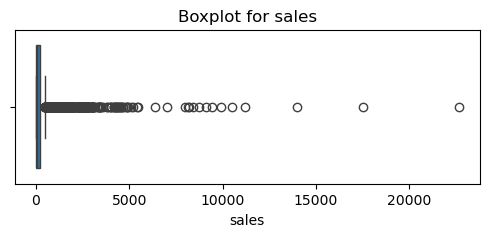

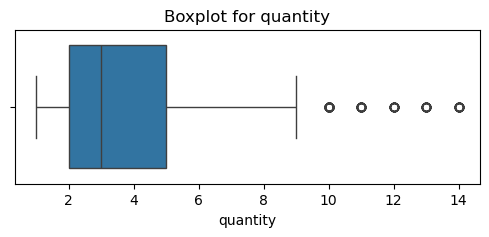

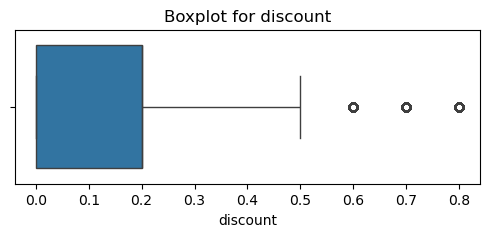

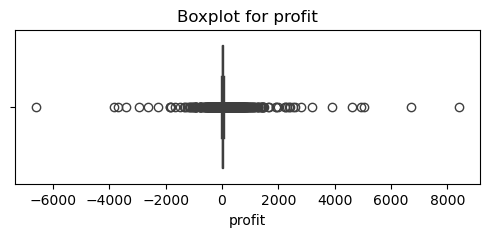

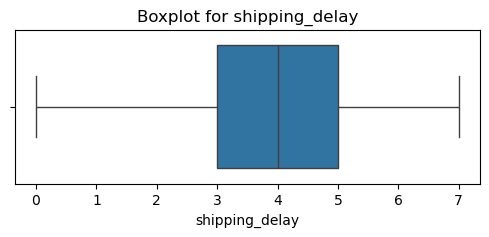

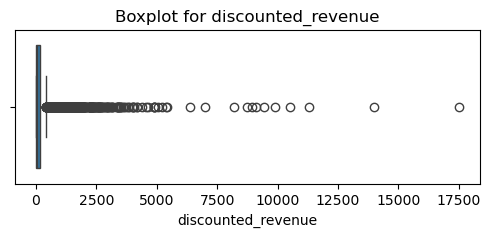

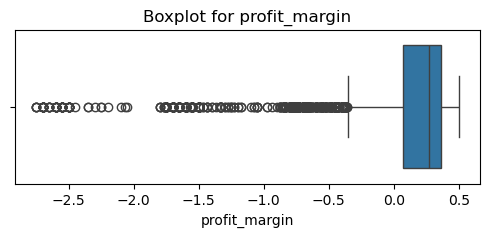

sales: 1167 outliers detected
quantity: 170 outliers detected
discount: 856 outliers detected
profit: 1881 outliers detected
shipping_delay: 0 outliers detected
discounted_revenue: 1154 outliers detected
profit_margin: 952 outliers detected


In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select only numeric columns for outlier detection
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Plot separate boxplots for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(6, 2))
    plt.title(f'Boxplot for {col}', fontsize=12)
    sns.boxplot(x=df[col])
    plt.show()

# Function to detect outliers using IQR
def detect_outliers_iqr(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    return outliers

# Detect outliers
outliers_dict = detect_outliers_iqr(df, numeric_cols)

# Print number of outliers per column
for col, outliers in outliers_dict.items():
    print(f"{col}: {len(outliers)} outliers detected")

In [74]:
# Function to detect outliers using the 3-standard deviation method
def detect_outliers_std(df, columns, threshold=3):
    outliers = {}
    for col in columns:
        mean = df[col].mean()
        std = df[col].std()
        lower_bound = mean - threshold * std
        upper_bound = mean + threshold * std
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    return outliers

# Detect outliers using 3-sigma rule
outliers_std_dict = detect_outliers_std(df, numeric_cols)

# Print number of outliers per column (3-sigma method)
print("\nOutliers detected using the 3-sigma rule:")
for col, outliers in outliers_std_dict.items():
    print(f"{col}: {len(outliers)} outliers detected")


Outliers detected using the 3-sigma rule:
sales: 127 outliers detected
quantity: 113 outliers detected
discount: 300 outliers detected
profit: 107 outliers detected
shipping_delay: 0 outliers detected
discounted_revenue: 131 outliers detected
profit_margin: 331 outliers detected


In [78]:
def filter_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] >= Q1 - 1.5*IQR) & (df[column] <= Q3 + 1.5*IQR)]

# Apply to key variables
df_filtered = filter_iqr(df, "sales")
df_filtered = filter_iqr(df_filtered, "profit")
df_filtered = filter_iqr(df_filtered, "discount")

In [94]:
df_filtered.describe()

,order_date,ship_date,sales,quantity,discount,profit,shipping_delay,discounted_revenue,profit_margin
count,6779,6779,6779.000000,6779.000000,6779.000000,6779.000000,6779.000000,6779.000000,6779.00000
mean,2016-05-02 05:21:36.297388800,2016-05-06 04:40:23.720312576,67.004453,3.453607,0.097199,11.327627,3.971382,59.158378,0.26616
min,2014-01-03 00:00:00,2014-01-07 00:00:00,0.990000,1.000000,0.000000,-27.715800,0.000000,0.990000,-0.68000
25%,2015-05-25 00:00:00,2015-05-27 12:00:00,14.940000,2.000000,0.000000,3.235200,3.000000,13.216000,0.11250
50%,2016-07-04 00:00:00,2016-07-06 00:00:00,34.790000,3.000000,0.000000,7.921200,4.000000,31.936000,0.31000
75%,2017-05-18 00:00:00,2017-05-20 00:00:00,82.600000,5.000000,0.200000,17.377200,5.000000,73.332000,0.39000
max,2017-12-30 00:00:00,2018-01-05 00:00:00,496.860000,14.000000,0.500000,50.584800,7.000000,496.860000,0.50000
std,NaN,NaN,84.303233,2.033511,0.105584,13.045945,1.748432,72.721195,0.17794


In [96]:
import statsmodels.formula.api as smf

formula = '''
    profit ~ 
    sales * discount +
    quantity+
    C(category) +
    C(region) +
    discount_binned
'''

# Fit the model using the formula
model1 = smf.ols(formula=formula, data=df_filtered).fit()

# Display summary results
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     266.4
Date:                Sat, 22 Mar 2025   Prob (F-statistic):               0.00
Time:                        12:17:52   Log-Likelihood:                -25542.
No. Observations:                6779   AIC:                         5.111e+04
Df Residuals:                    6764   BIC:                         5.122e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

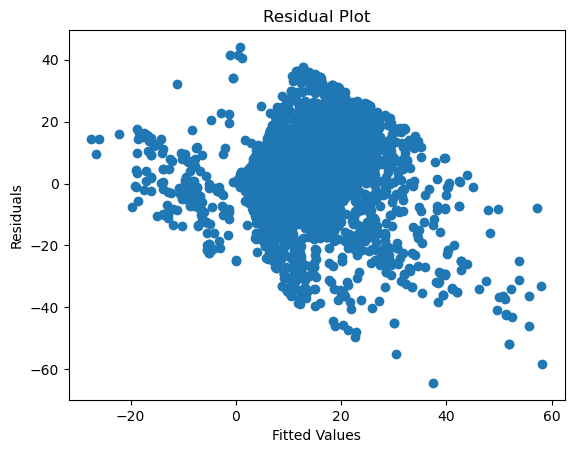

In [124]:
import matplotlib.pyplot as plt
plt.scatter(model1.fittedvalues, model1.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

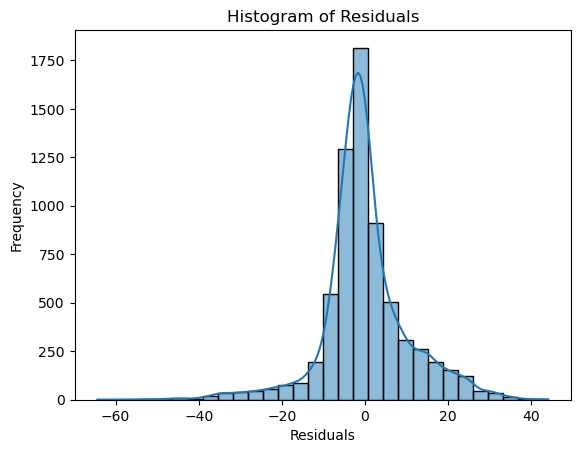

In [148]:
# Get residuals
residuals1 = model1.resid

# Plot histogram
sns.histplot(residuals1, kde=True, bins=30)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [108]:
# Apply to key variables
df_filtered1 = filter_iqr(df, "sales")          # Step 1: Filter sales on original df
df_filtered1 = filter_iqr(df_filtered1, "profit")  # Step 2: Filter profit on sales-filtered df_filtered1

In [110]:
df_filtered1.describe()

,order_date,ship_date,sales,quantity,discount,profit,shipping_delay,discounted_revenue,profit_margin
count,7392,7392,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000
mean,2016-05-01 18:59:01.558441216,2016-05-05 18:24:32.727272704,62.314599,3.464962,0.148635,9.636050,3.976055,54.519229,0.157979
min,2014-01-03 00:00:00,2014-01-07 00:00:00,0.444000,1.000000,0.000000,-27.735000,0.000000,0.088800,-2.750000
25%,2015-05-25 00:00:00,2015-05-28 18:00:00,12.960000,2.000000,0.000000,2.133200,3.000000,10.782800,0.087500
50%,2016-07-02 12:00:00,2016-07-04 00:00:00,30.560000,3.000000,0.200000,6.797800,4.000000,26.870000,0.290000
75%,2017-05-14 00:00:00,2017-05-18 00:00:00,75.850000,5.000000,0.200000,16.016250,5.000000,67.915000,0.375000
max,2017-12-30 00:00:00,2018-01-05 00:00:00,496.860000,14.000000,0.800000,50.584800,7.000000,496.860000,0.500000
std,NaN,NaN,82.271335,2.041211,0.199668,13.843595,1.746975,71.335996,0.424603


In [112]:
# Fit the model using the formula
model2 = smf.ols(formula=formula, data=df_filtered1).fit()

# Display summary results
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     423.9
Date:                Sat, 22 Mar 2025   Prob (F-statistic):               0.00
Time:                        12:24:21   Log-Likelihood:                -27732.
No. Observations:                7392   AIC:                         5.549e+04
Df Residuals:                    7377   BIC:                         5.560e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

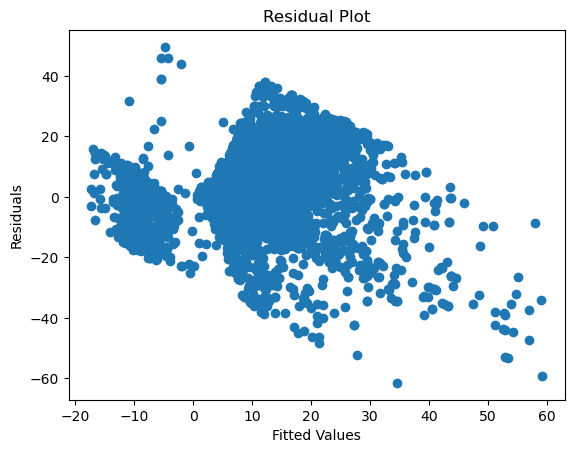

In [128]:
import matplotlib.pyplot as plt
plt.scatter(model2.fittedvalues, model2.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

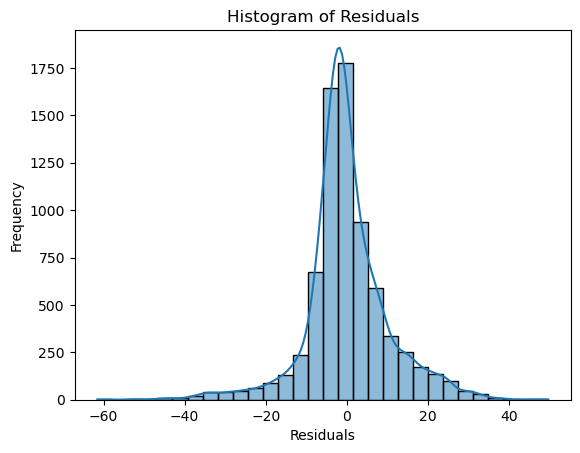

In [150]:
# Get residuals
residuals2 = model2.resid

# Plot histogram
sns.histplot(residuals2, kde=True, bins=30)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [116]:
# Apply to key variables
df_filtered2 = filter_iqr(df, "sales")

In [118]:
df_filtered2.describe()

,order_date,ship_date,sales,quantity,discount,profit,shipping_delay,discounted_revenue,profit_margin
count,8827,8827,8827.000000,8827.000000,8827.000000,8827.000000,8827.000000,8827.000000,8827.000000
mean,2016-05-02 15:45:12.541067264,2016-05-06 14:57:05.036818688,92.864853,3.608587,0.157606,11.198644,3.966580,80.049444,0.123174
min,2014-01-03 00:00:00,2014-01-07 00:00:00,0.444000,1.000000,0.000000,-1181.282400,0.000000,0.088800,-2.750000
25%,2015-05-28 00:00:00,2015-05-31 00:00:00,15.008000,2.000000,0.000000,1.702400,3.000000,12.535000,0.075000
50%,2016-07-01 00:00:00,2016-07-03 00:00:00,40.880000,3.000000,0.200000,7.437600,4.000000,35.760000,0.280000
75%,2017-05-15 00:00:00,2017-05-19 00:00:00,124.225000,5.000000,0.200000,21.335400,5.000000,109.401100,0.375000
max,2017-12-30 00:00:00,2018-01-05 00:00:00,498.260000,14.000000,0.800000,240.859500,7.000000,498.260000,0.500000
std,NaN,NaN,114.045078,2.129308,0.211531,49.066101,1.745901,100.208643,0.485676


In [120]:
# Fit the model using the formula
model3 = smf.ols(formula=formula, data=df_filtered2).fit()

# Display summary results
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     1555.
Date:                Sat, 22 Mar 2025   Prob (F-statistic):               0.00
Time:                        12:26:14   Log-Likelihood:                -41397.
No. Observations:                8827   AIC:                         8.282e+04
Df Residuals:                    8812   BIC:                         8.293e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

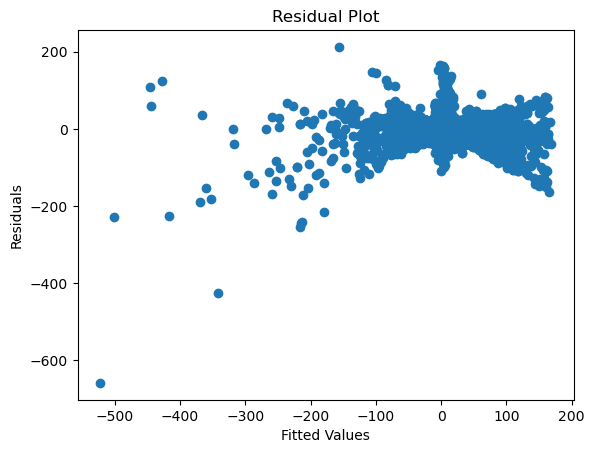

In [134]:
import matplotlib.pyplot as plt
plt.scatter(model3.fittedvalues, model3.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

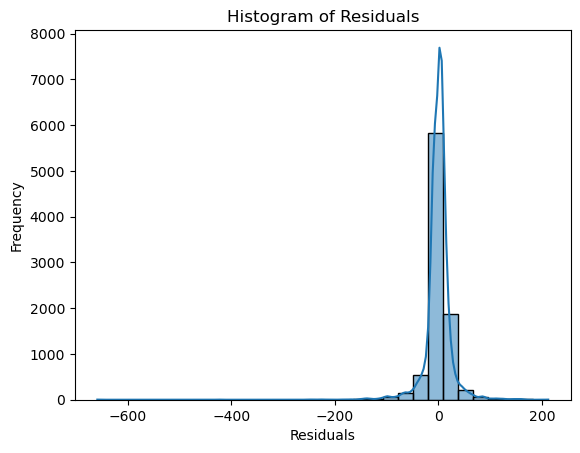

In [152]:
# Get residuals
residuals3 = model3.resid

# Plot histogram
sns.histplot(residuals3, kde=True, bins=30)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [138]:
# Apply to key variables
df_filtered3 = filter_iqr(df, "profit")

In [140]:
# Fit the model using the formula
model4 = smf.ols(formula=formula, data=df_filtered3).fit()

# Display summary results
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     379.2
Date:                Sat, 22 Mar 2025   Prob (F-statistic):               0.00
Time:                        12:33:47   Log-Likelihood:                -33200.
No. Observations:                8113   AIC:                         6.643e+04
Df Residuals:                    8098   BIC:                         6.654e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

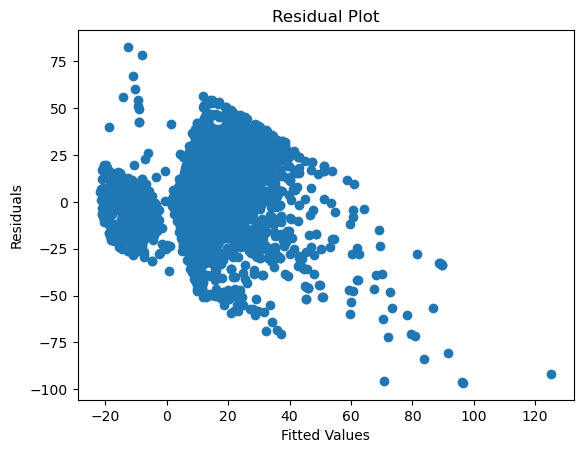

In [142]:
plt.scatter(model4.fittedvalues, model4.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

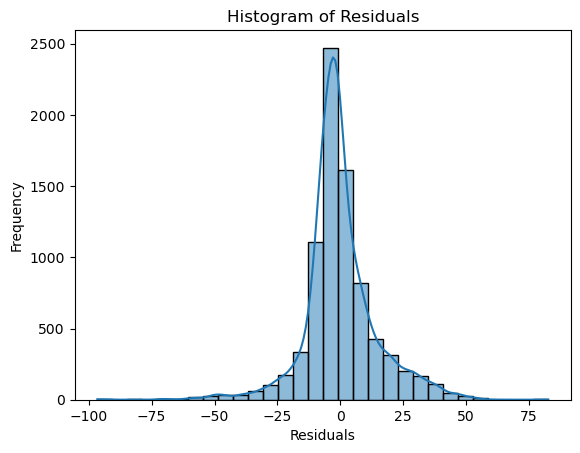

In [162]:
# Get residuals
residuals4 = model4.resid

# Plot histogram
sns.histplot(residuals4, kde=True, bins=30)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [182]:
# Apply to key variables
df_filtered4 = filter_iqr(df, "discount")          # Step 1: Filter sales on original df
df_filtered4 = filter_iqr(df_filtered4, "sales")  # Step 2: Filter profit on sales-filtered df_filtered1

In [184]:
# Fit the model using the formula
model5 = smf.ols(formula=formula, data=df_filtered4).fit()

# Display summary results
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     1097.
Date:                Sat, 22 Mar 2025   Prob (F-statistic):               0.00
Time:                        13:08:13   Log-Likelihood:                -36899.
No. Observations:                8120   AIC:                         7.383e+04
Df Residuals:                    8105   BIC:                         7.393e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

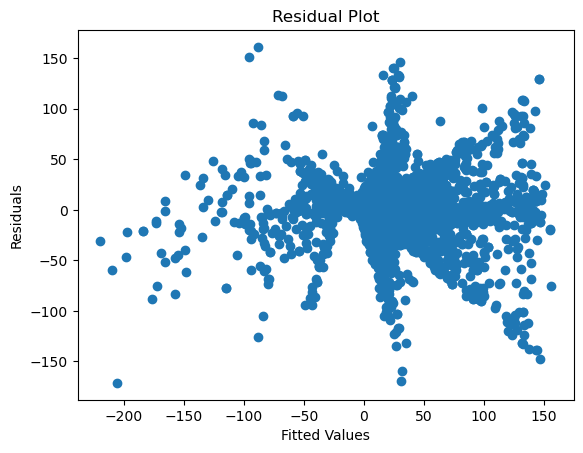

In [186]:
plt.scatter(model5.fittedvalues, model5.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

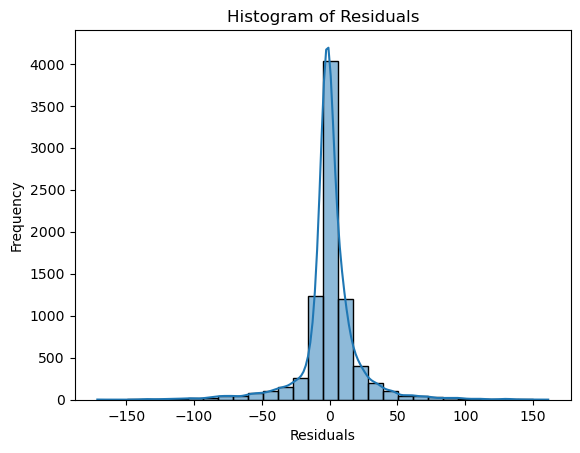

In [188]:
# Get residuals
residuals5 = model5.resid

# Plot histogram
sns.histplot(residuals5, kde=True, bins=30)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [13]:
# Top 50 highest sales transactions
top_sales = df.nlargest(50, 'sales')

# Top 50 highest profit transactions
top_profits = df.nlargest(50, 'profit')

# Top 50 most negative profit transactions (biggest losses)
bottom_profits = df.nsmallest(50, 'profit')

# Display results
print("Top 50 Sales Transactions:")
display(top_sales)

print("\nTop 50 Profit Transactions:")
display(top_profits)

print("\nTop 50 Negative Profit Transactions (Biggest Losses):")
display(bottom_profits)

Top 50 Sales Transactions:


,order_date,ship_date,ship_mode,customer_id,segment,city,state,region,product_id,category,sub_category,sales,quantity,discount,profit,shipping_delay,discount_binned,discounted_revenue,profit_margin
2697,2014-03-18,2014-03-23,Standard Class,SM-20320,Home Office,Jacksonville,Florida,South,TEC-MA-10002412,Technology,Machines,22638.480,6,0.50,-1811.0784,5,41-100%,11319.2400,-0.080000
6826,2016-10-02,2016-10-09,Standard Class,TC-20980,Corporate,Lafayette,Indiana,Central,TEC-CO-10004722,Technology,Copiers,17499.950,5,0.00,8399.9760,7,No Discount,17499.9500,0.480000
8153,2017-03-23,2017-03-25,First Class,RB-19360,Consumer,Seattle,Washington,West,TEC-CO-10004722,Technology,Copiers,13999.960,4,0.00,6719.9808,2,No Discount,13999.9600,0.480000
2623,2017-10-22,2017-10-24,First Class,TA-21385,Home Office,New York City,New York,East,TEC-CO-10004722,Technology,Copiers,11199.968,4,0.20,3919.9888,2,11-20%,8959.9744,0.350000
4190,2017-11-17,2017-11-22,Standard Class,HL-15040,Consumer,Newark,Delaware,East,TEC-CO-10004722,Technology,Copiers,10499.970,3,0.00,5039.9856,5,No Discount,10499.9700,0.480000
9039,2016-12-17,2016-12-21,Standard Class,AB-10105,Consumer,Detroit,Michigan,Central,OFF-BI-10000545,Office Supplies,Binders,9892.740,13,0.00,4946.3700,4,No Discount,9892.7400,0.500000
4098,2014-09-23,2014-09-28,Standard Class,SC-20095,Consumer,Minneapolis,Minnesota,Central,OFF-BI-10001120,Office Supplies,Binders,9449.950,5,0.00,4630.4755,5,No Discount,9449.9500,0.490000
4277,2016-04-16,2016-04-20,Standard Class,BS-11365,Corporate,Lakewood,New Jersey,East,TEC-MA-10001047,Technology,Machines,9099.930,7,0.00,2365.9818,4,No Discount,9099.9300,0.260000
8488,2016-02-02,2016-02-04,Second Class,SE-20110,Consumer,Arlington,Virginia,South,TEC-MA-10001127,Technology,Machines,8749.950,5,0.00,2799.9840,2,No Discount,8749.9500,0.320000
6425,2016-05-23,2016-05-27,Standard Class,CC-12370,Consumer,Philadelphia,Pennsylvania,East,TEC-CO-10004722,Technology,Copiers,8399.976,4,0.40,1119.9968,4,31-40%,5039.9856,0.133333



Top 50 Profit Transactions:


,order_date,ship_date,ship_mode,customer_id,segment,city,state,region,product_id,category,sub_category,sales,quantity,discount,profit,shipping_delay,discount_binned,discounted_revenue,profit_margin
6826,2016-10-02,2016-10-09,Standard Class,TC-20980,Corporate,Lafayette,Indiana,Central,TEC-CO-10004722,Technology,Copiers,17499.950,5,0.0,8399.9760,7,No Discount,17499.9500,0.480000
8153,2017-03-23,2017-03-25,First Class,RB-19360,Consumer,Seattle,Washington,West,TEC-CO-10004722,Technology,Copiers,13999.960,4,0.0,6719.9808,2,No Discount,13999.9600,0.480000
4190,2017-11-17,2017-11-22,Standard Class,HL-15040,Consumer,Newark,Delaware,East,TEC-CO-10004722,Technology,Copiers,10499.970,3,0.0,5039.9856,5,No Discount,10499.9700,0.480000
9039,2016-12-17,2016-12-21,Standard Class,AB-10105,Consumer,Detroit,Michigan,Central,OFF-BI-10000545,Office Supplies,Binders,9892.740,13,0.0,4946.3700,4,No Discount,9892.7400,0.500000
4098,2014-09-23,2014-09-28,Standard Class,SC-20095,Consumer,Minneapolis,Minnesota,Central,OFF-BI-10001120,Office Supplies,Binders,9449.950,5,0.0,4630.4755,5,No Discount,9449.9500,0.490000
2623,2017-10-22,2017-10-24,First Class,TA-21385,Home Office,New York City,New York,East,TEC-CO-10004722,Technology,Copiers,11199.968,4,0.2,3919.9888,2,11-20%,8959.9744,0.350000
509,2015-03-16,2015-03-22,Standard Class,CM-12385,Consumer,Atlanta,Georgia,South,OFF-BI-10003527,Office Supplies,Binders,6354.950,5,0.0,3177.4750,6,No Discount,6354.9500,0.500000
8488,2016-02-02,2016-02-04,Second Class,SE-20110,Consumer,Arlington,Virginia,South,TEC-MA-10001127,Technology,Machines,8749.950,5,0.0,2799.9840,2,No Discount,8749.9500,0.320000
7666,2016-10-04,2016-10-08,Standard Class,DR-12940,Home Office,Providence,Rhode Island,East,TEC-CO-10001449,Technology,Copiers,5399.910,9,0.0,2591.9568,4,No Discount,5399.9100,0.480000
6520,2017-01-16,2017-01-18,Second Class,AR-10540,Consumer,Jackson,Michigan,Central,OFF-BI-10004995,Office Supplies,Binders,5443.960,4,0.0,2504.2216,2,No Discount,5443.9600,0.460000



Top 50 Negative Profit Transactions (Biggest Losses):


,order_date,ship_date,ship_mode,customer_id,segment,city,state,region,product_id,category,sub_category,sales,quantity,discount,profit,shipping_delay,discount_binned,discounted_revenue,profit_margin
7772,2016-11-25,2016-12-02,Standard Class,CS-12505,Consumer,Lancaster,Ohio,East,TEC-MA-10000418,Technology,Machines,4499.985,5,0.7,-6599.9780,7,41-100%,1349.9955,-1.466667
683,2017-11-04,2017-11-04,Same Day,GT-14635,Corporate,Burlington,North Carolina,South,TEC-MA-10004125,Technology,Machines,7999.980,4,0.5,-3839.9904,0,41-100%,3999.9900,-0.480000
9774,2014-07-26,2014-07-30,Standard Class,LF-17185,Consumer,San Antonio,Texas,Central,OFF-BI-10004995,Office Supplies,Binders,2177.584,8,0.8,-3701.8928,4,41-100%,435.5168,-1.700000
3011,2017-04-17,2017-04-23,Standard Class,SR-20425,Home Office,Louisville,Colorado,West,TEC-MA-10000822,Technology,Machines,2549.985,5,0.7,-3399.9800,6,41-100%,764.9955,-1.333333
4991,2017-12-07,2017-12-13,Standard Class,HG-14965,Corporate,Chicago,Illinois,Central,OFF-BI-10001120,Office Supplies,Binders,1889.990,5,0.8,-2929.4845,6,41-100%,377.9980,-1.550000
3151,2015-12-15,2015-12-18,First Class,NF-18385,Consumer,Newark,Ohio,East,TEC-MA-10000418,Technology,Machines,1799.994,2,0.7,-2639.9912,3,41-100%,539.9982,-1.466667
5310,2017-11-19,2017-11-21,First Class,NC-18415,Consumer,Houston,Texas,Central,OFF-BI-10003527,Office Supplies,Binders,1525.188,6,0.8,-2287.7820,2,41-100%,305.0376,-1.500000
9639,2015-01-28,2015-01-31,Second Class,JH-15985,Consumer,Concord,North Carolina,South,FUR-TA-10000198,Furniture,Tables,4297.644,13,0.4,-1862.3124,3,31-40%,2578.5864,-0.433333
1199,2016-04-08,2016-04-12,Standard Class,ZC-21910,Consumer,Houston,Texas,Central,OFF-BI-10004995,Office Supplies,Binders,1088.792,4,0.8,-1850.9464,4,41-100%,217.7584,-1.700000
2697,2014-03-18,2014-03-23,Standard Class,SM-20320,Home Office,Jacksonville,Florida,South,TEC-MA-10002412,Technology,Machines,22638.480,6,0.5,-1811.0784,5,41-100%,11319.2400,-0.080000


In [15]:
# Filter the dataset for the specific product ID
binder_info = df[df['product_id'] == 'OFF-BI-10000545']

# Display the relevant information
print("Binder Information:")
display(binder_info)

Binder Information:


,order_date,ship_date,ship_mode,customer_id,segment,city,state,region,product_id,category,sub_category,sales,quantity,discount,profit,shipping_delay,discount_binned,discounted_revenue,profit_margin
869,2016-09-03,2016-09-05,First Class,PK-18910,Home Office,Philadelphia,Pennsylvania,East,OFF-BI-10000545,Office Supplies,Binders,1141.470,5,0.7,-760.980,2,41-100%,342.4410,-0.666667
1582,2015-08-09,2015-08-12,First Class,NP-18325,Consumer,New York City,New York,East,OFF-BI-10000545,Office Supplies,Binders,1217.568,2,0.2,456.588,3,11-20%,974.0544,0.375000
4355,2015-12-04,2015-12-07,Second Class,RO-19780,Consumer,Clarksville,Tennessee,South,OFF-BI-10000545,Office Supplies,Binders,1598.058,7,0.7,-1065.372,3,41-100%,479.4174,-0.666667
7771,2016-11-25,2016-12-02,Standard Class,CS-12505,Consumer,Lancaster,Ohio,East,OFF-BI-10000545,Office Supplies,Binders,456.588,2,0.7,-304.392,7,41-100%,136.9764,-0.666667
8208,2015-09-20,2015-09-24,Standard Class,BG-11035,Consumer,Nashville,Tennessee,South,OFF-BI-10000545,Office Supplies,Binders,1369.764,6,0.7,-913.176,4,41-100%,410.9292,-0.666667
8632,2016-07-28,2016-07-29,First Class,OT-18730,Consumer,Bethlehem,Pennsylvania,East,OFF-BI-10000545,Office Supplies,Binders,1369.764,6,0.7,-913.176,1,41-100%,410.9292,-0.666667
8640,2017-01-12,2017-01-16,Standard Class,DB-13120,Corporate,Dallas,Texas,Central,OFF-BI-10000545,Office Supplies,Binders,760.980,5,0.8,-1141.470,4,41-100%,152.1960,-1.500000
8832,2015-06-22,2015-06-27,Standard Class,SW-20455,Consumer,Rochester,New York,East,OFF-BI-10000545,Office Supplies,Binders,1217.568,2,0.2,456.588,5,11-20%,974.0544,0.375000
9039,2016-12-17,2016-12-21,Standard Class,AB-10105,Consumer,Detroit,Michigan,Central,OFF-BI-10000545,Office Supplies,Binders,9892.740,13,0.0,4946.370,4,No Discount,9892.7400,0.500000


In [19]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select numeric independent variables (excluding 'profit' as it's the dependent variable)
X = df.select_dtypes(include=[np.number]).drop(columns=['profit'], errors='ignore')

# Add a constant for VIF calculation (important for detecting collinearity with intercept)
X = sm.add_constant(X)

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Drop the constant column for display
vif_data = vif_data[vif_data["Variable"] != "const"]

print("Variance Inflation Factor (VIF) Results:")
print(vif_data)

Variance Inflation Factor (VIF) Results:
             Variable        VIF
1               sales  18.297924
2            quantity   1.043949
3            discount   4.138062
4      shipping_delay   1.001010
5  discounted_revenue  18.472821
6       profit_margin   3.999137


In [21]:
print(df.dtypes)

order_date            datetime64[ns]
ship_date             datetime64[ns]
ship_mode                     object
customer_id                   object
segment                       object
city                          object
state                         object
region                        object
product_id                    object
category                      object
sub_category                  object
sales                        float64
quantity                       int64
discount                     float64
profit                       float64
shipping_delay                 int64
discount_binned               object
discounted_revenue           float64
profit_margin                float64
dtype: object



Correlation Matrix:
                       sales  quantity  discount    profit  shipping_delay  \
sales               1.000000  0.200795 -0.028190  0.479064       -0.007354   
quantity            0.200795  1.000000  0.008623  0.066253        0.018298   
discount           -0.028190  0.008623  1.000000 -0.219487        0.000408   
profit              0.479064  0.066253 -0.219487  1.000000       -0.004649   
shipping_delay     -0.007354  0.018298  0.000408 -0.004649        1.000000   
discounted_revenue  0.970510  0.201171 -0.086325  0.632732       -0.006518   
profit_margin       0.003444 -0.005280 -0.864452  0.223732       -0.011815   

                    discounted_revenue  profit_margin  
sales                         0.970510       0.003444  
quantity                      0.201171      -0.005280  
discount                     -0.086325      -0.864452  
profit                        0.632732       0.223732  
shipping_delay               -0.006518      -0.011815  
discounted_revenue

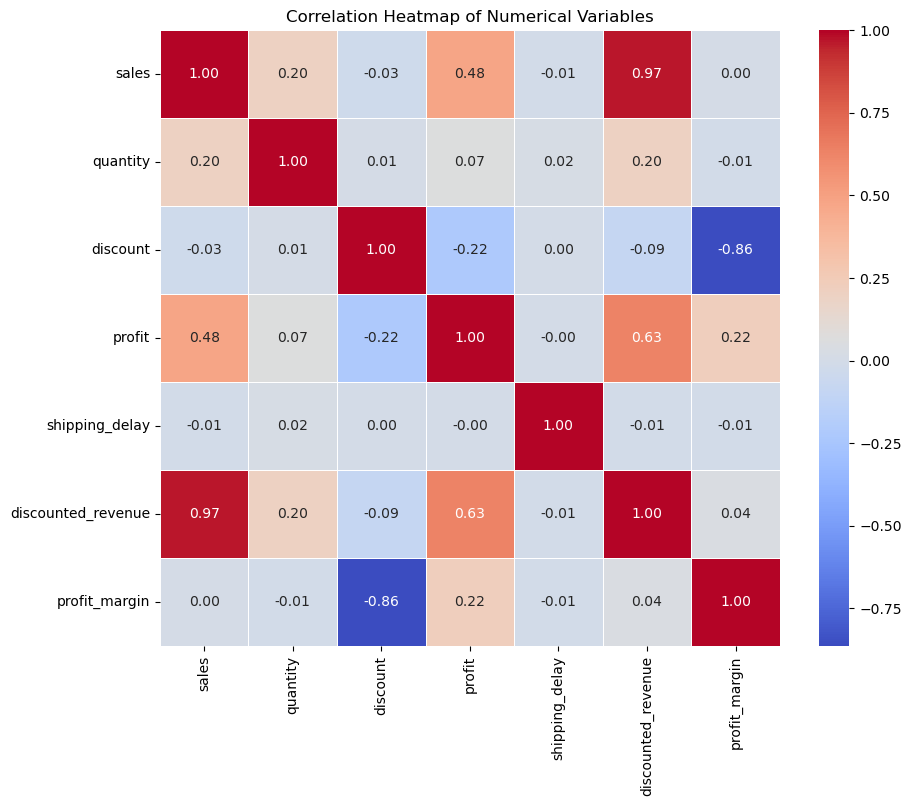

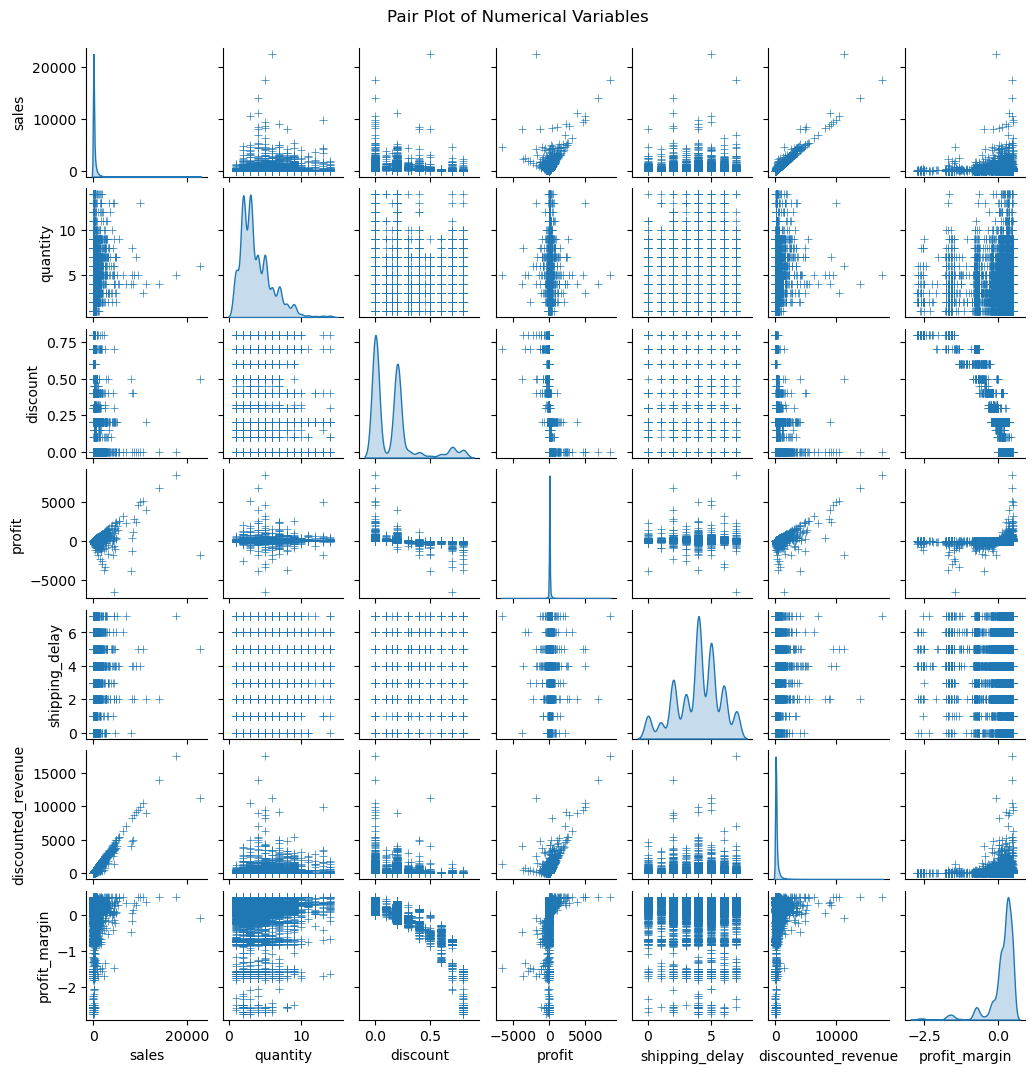

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical variables
numerical_vars = df.select_dtypes(include=['float64', 'int64'])

# Display correlation matrix
correlation_matrix = numerical_vars.corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)

# Plot heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

# Create pair plot to explore linearity visually
sns.pairplot(numerical_vars, diag_kind='kde', markers='+', height=1.5)
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()



Correlation Matrix with Categorical Variables (One-Hot Encoded):
profit                         1.000000
discount_binned_No Discount    0.156883
category_Technology            0.101825
region_West                    0.015222
segment_Home Office            0.010268
region_East                    0.009376
segment_Corporate              0.005056
ship_mode_Second Class         0.001844
ship_mode_Same Day             0.000624
region_South                   0.000377
ship_mode_Standard Class      -0.006040
discount_binned_11-20%        -0.012849
category_Office Supplies      -0.043822
discount_binned_21-30%        -0.048379
discount_binned_31-40%        -0.090938
discount_binned_41-100%       -0.185431
Name: profit, dtype: float64


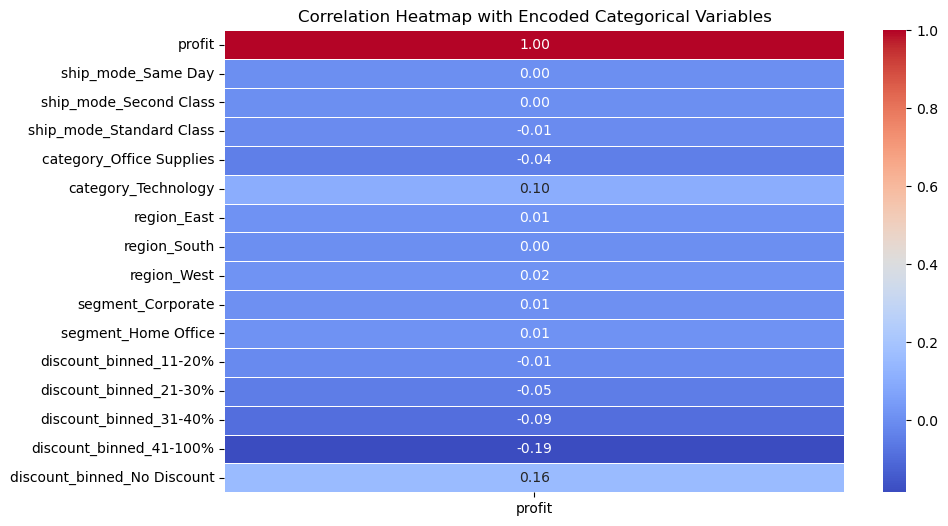

In [10]:
# One-hot encode categorical variables
cat_vars = ['ship_mode', 'category', 'region', 'segment', 'discount_binned']
df_encoded = pd.get_dummies(df, columns=cat_vars, drop_first=True)

# Check correlation between profit and encoded variables
encoded_vars = [col for col in df_encoded.columns if col.startswith(tuple(cat_vars))]
correlation_matrix_cat = df_encoded[['profit'] + encoded_vars].corr()

# Display correlation matrix for categorical variables
print("\nCorrelation Matrix with Categorical Variables (One-Hot Encoded):")
print(correlation_matrix_cat['profit'].sort_values(ascending=False))

# Plot heatmap to visualize correlations
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_cat[['profit']], annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap with Encoded Categorical Variables')
plt.show()


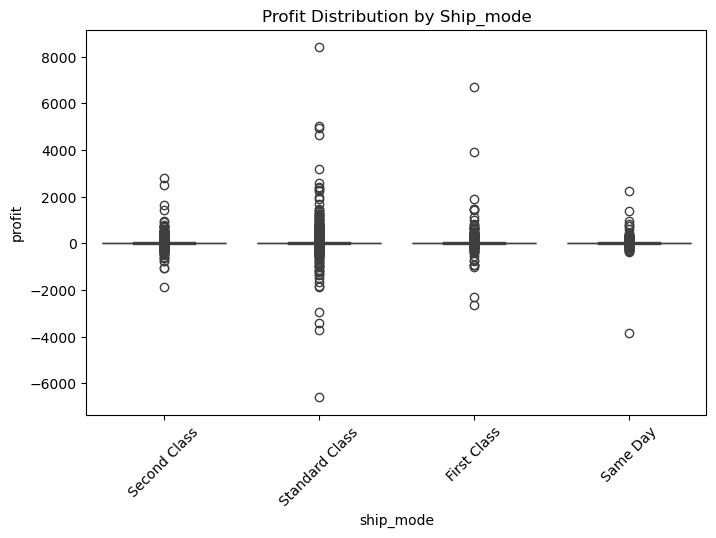

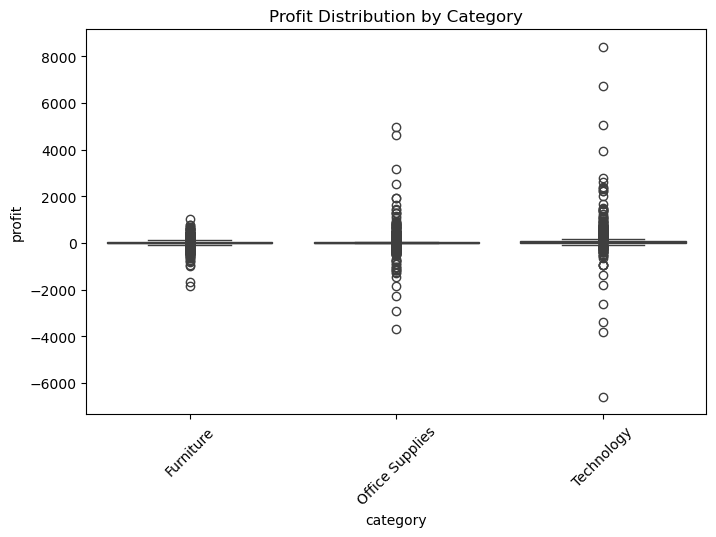

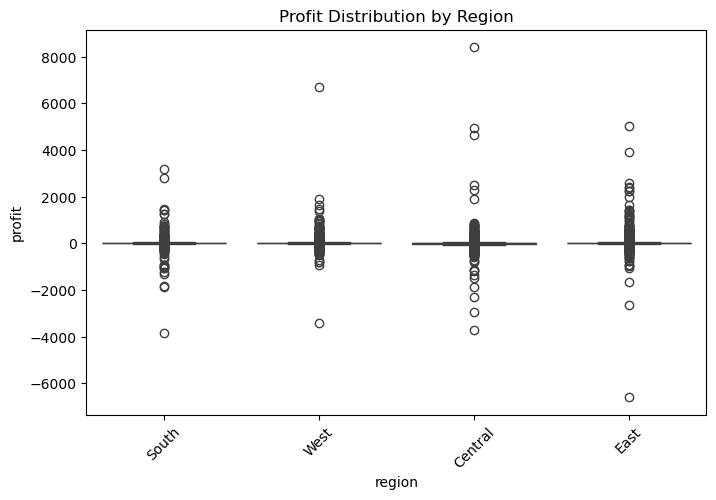

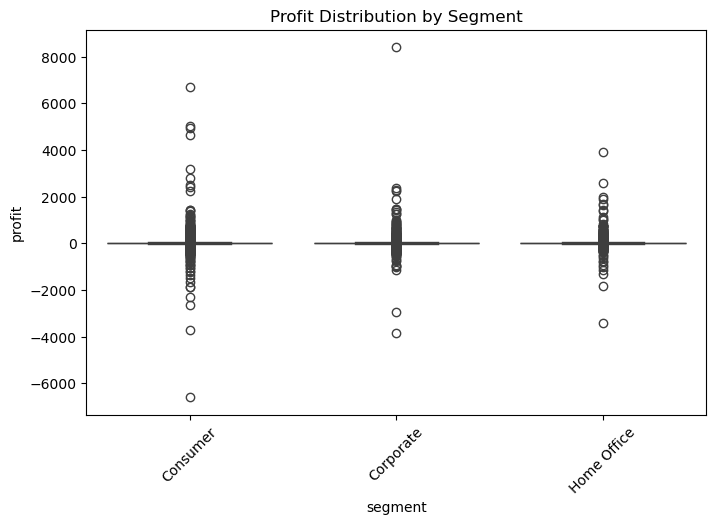

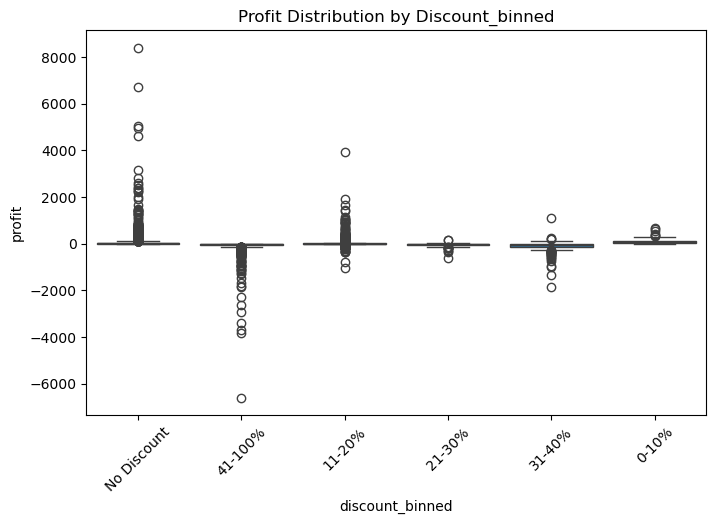

In [12]:
# Plot profit distribution across categorical variables
cat_vars_plot = ['ship_mode', 'category', 'region', 'segment', 'discount_binned']

for var in cat_vars_plot:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=var, y='profit', data=df)
    plt.title(f'Profit Distribution by {var.capitalize()}')
    plt.xticks(rotation=45)
    plt.show()

In [14]:
from scipy.stats import f_oneway

# Define categorical variables to test
cat_vars_anova = ['ship_mode', 'category', 'region', 'segment', 'discount_binned']

# Run ANOVA for each categorical variable
for var in cat_vars_anova:
    groups = [group['profit'].dropna() for name, group in df.groupby(var)]
    f_stat, p_value = f_oneway(*groups)
    print(f"\nANOVA Results for {var.capitalize()}:")
    print(f"F-statistic: {f_stat:.4f}, p-value: {p_value:.4f}")
    if p_value < 0.05:
        print(f"Significant relationship between {var} and profit (p < 0.05)")
    else:
        print(f"No significant relationship between {var} and profit (p >= 0.05)")


ANOVA Results for Ship_mode:
F-statistic: 0.1539, p-value: 0.9272
No significant relationship between ship_mode and profit (p >= 0.05)

ANOVA Results for Category:
F-statistic: 54.3110, p-value: 0.0000
Significant relationship between category and profit (p < 0.05)

ANOVA Results for Region:
F-statistic: 2.6225, p-value: 0.0489
Significant relationship between region and profit (p < 0.05)

ANOVA Results for Segment:
F-statistic: 0.8981, p-value: 0.4074
No significant relationship between segment and profit (p >= 0.05)

ANOVA Results for Discount_binned:
F-statistic: 116.7492, p-value: 0.0000
Significant relationship between discount_binned and profit (p < 0.05)


In [82]:
import statsmodels.formula.api as smf

formula = '''
    profit ~ 
    sales * discount +
    quantity+
    C(category) +
    C(region) +
    discount_binned
'''

# Fit the model using the formula
model = smf.ols(formula=formula, data=df).fit()

# Display summary results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     1888.
Date:                Sat, 22 Mar 2025   Prob (F-statistic):               0.00
Time:                        12:10:08   Log-Likelihood:                -62244.
No. Observations:                9994   AIC:                         1.245e+05
Df Residuals:                    9979   BIC:                         1.246e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

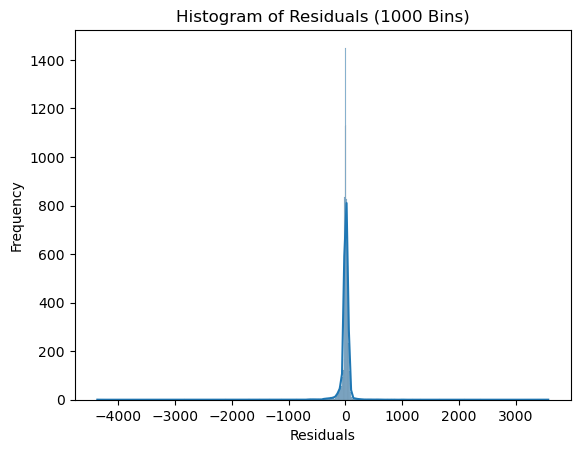

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get residuals
residuals = model.resid

# Plot histogram
sns.histplot(residuals, kde=True, bins=1000)
plt.title("Histogram of Residuals (1000 Bins)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show() 

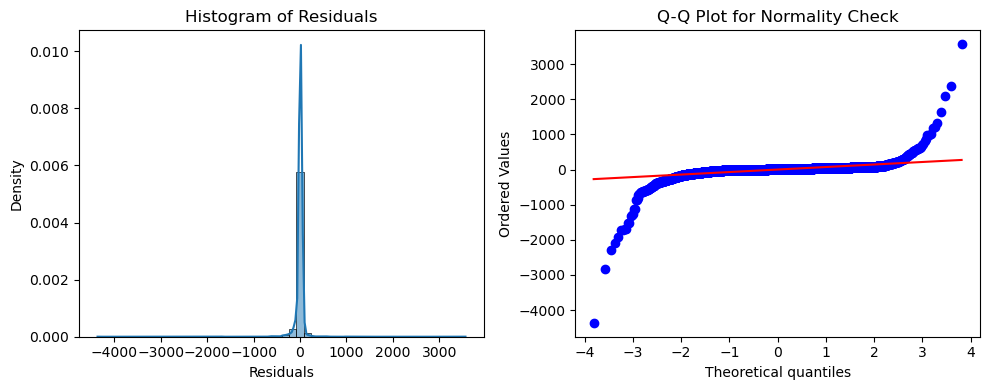

In [180]:
from scipy import stats

plt.figure(figsize=(10, 4))

# Histogram with smaller bins
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True, bins=50, stat='density')
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")

# Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot for Normality Check")

plt.tight_layout()
plt.show()

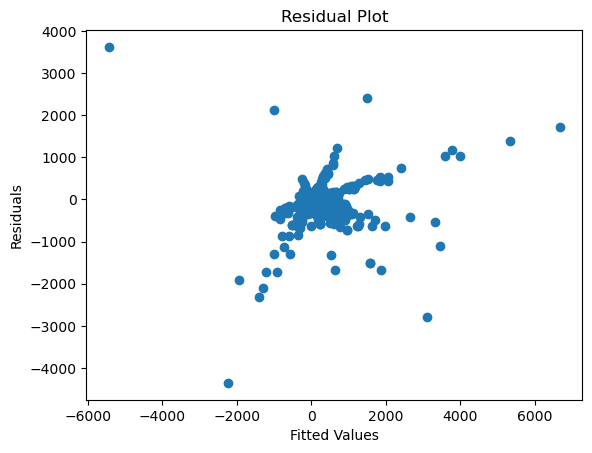

In [24]:
import matplotlib.pyplot as plt
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = model.model.exog
vif_data = pd.DataFrame({'VIF': [variance_inflation_factor(X, i) for i in range(X.shape[1])],
                         'Variable': model.model.exog_names})
print(vif_data)

           VIF                        Variable
0   127.220585                       Intercept
1     1.926326  C(category)[T.Office Supplies]
2     1.716550       C(category)[T.Technology]
3     1.688577               C(region)[T.East]
4     1.486208              C(region)[T.South]
5     1.769129               C(region)[T.West]
6    29.131969       discount_binned[T.11-20%]
7     4.681222       discount_binned[T.21-30%]
8     6.169786       discount_binned[T.31-40%]
9    51.252938      discount_binned[T.41-100%]
10   32.759114  discount_binned[T.No Discount]
11    1.707202                           sales
12   59.597729                        discount
13    1.774154                  sales:discount


                            OLS Regression Results                            
Dep. Variable:             log_profit   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     444.4
Date:                Sat, 22 Mar 2025   Prob (F-statistic):               0.00
Time:                        09:51:39   Log-Likelihood:                -12236.
No. Observations:                8158   AIC:                         2.450e+04
Df Residuals:                    8144   BIC:                         2.460e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


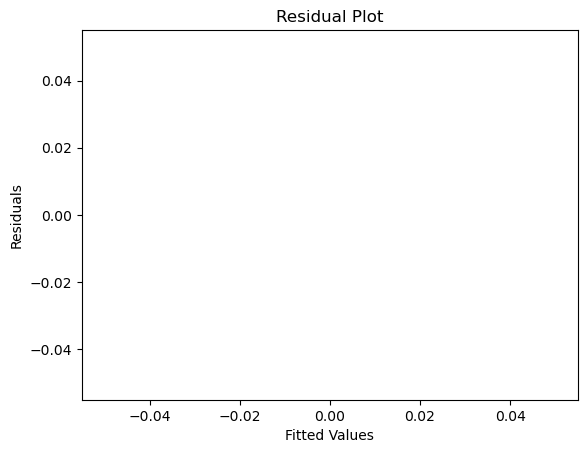

In [50]:
df['log_profit'] = np.log1p(df['profit'])  # log1p handles zero values

# Update the regression formula with log-transformed profit
formula_log = '''
    log_profit ~ 
   sales * discount +
    C(category) +
    C(region) +
    discount_binned
'''

# Run the new regression model
model_log = smf.ols(formula_log, data=df).fit()

# Print the new model summary
print(model_log.summary())
import matplotlib.pyplot as plt
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [23]:
import statsmodels.formula.api as smf


# Define regression formula with relevant variables
formula = '''
    profit ~ 
    discount + 
    quantity + 
    shipping_delay +
    C(ship_mode)+
    C(category) +  
    C(region) + 
    C(segment)
'''

# Run regression model
model = smf.ols(formula, data=df).fit()

# Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     50.78
Date:                Fri, 21 Mar 2025   Prob (F-statistic):          2.83e-128
Time:                        17:12:12   Log-Likelihood:                -68392.
No. Observations:                9994   AIC:                         1.368e+05
Df Residuals:                    9980   BIC:                         1.369e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [25]:
# Define regression formula with relevant variables
formula = '''
    profit ~  
    quantity + 
    C(ship_mode)+
    C(category) +  
    C(region) + 
    C(segment)+
    C(discount_binned)
'''

# Run regression model
model = smf.ols(formula, data=df).fit()

# Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     47.47
Date:                Fri, 21 Mar 2025   Prob (F-statistic):          1.51e-145
Time:                        17:12:12   Log-Likelihood:                -68345.
No. Observations:                9994   AIC:                         1.367e+05
Df Residuals:                    9977   BIC:                         1.368e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [27]:
import matplotlib.pyplot as plt
import os

# Create a directory to save plots (optional)
os.makedirs("plots", exist_ok=True)  # Creates a folder named "plots"

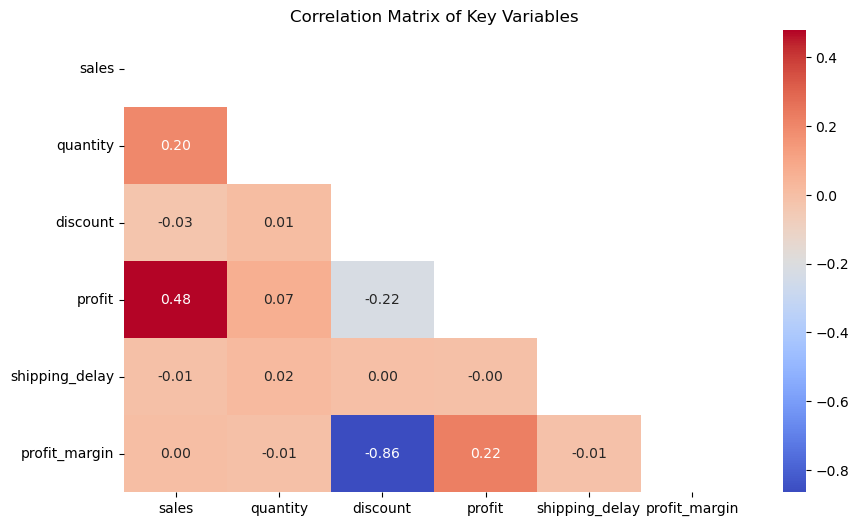

In [17]:
# Calculate correlations
corr = df[key_vars].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    corr, 
    annot=True, 
    cmap='coolwarm', 
    fmt=".2f", 
    mask=np.triu(np.ones_like(corr, dtype=bool)))  # Hide upper triangle for clarity
plt.title("Correlation Matrix of Key Variables")
# Save the heatmap
plt.savefig(
    os.path.join("plots", "correlation_heatmap.png"),
    dpi=300,
    bbox_inches='tight'
)
plt.show()

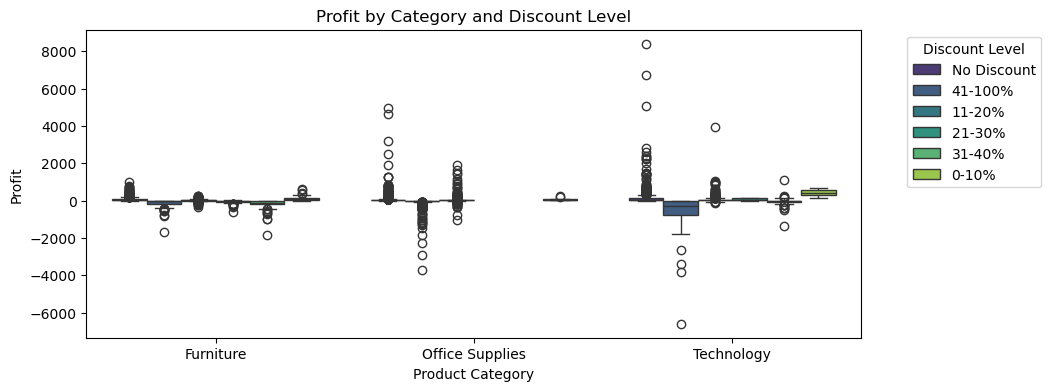

In [35]:
# Interaction between discount and category
plt.figure(figsize=(10, 4))
sns.boxplot(
    x='category', 
    y='profit', 
    hue='discount_binned', 
    data=df, 
    palette='viridis'
)
plt.title("Profit by Category and Discount Level")
plt.xlabel("Product Category")
plt.ylabel("Profit")
plt.legend(title='Discount Level', bbox_to_anchor=(1.05, 1), loc='upper left')
# Save the boxplot
plt.savefig(
    os.path.join("plots", "profit_by_category_discount.png"),
    dpi=300,
    bbox_inches='tight'
)
plt.show()

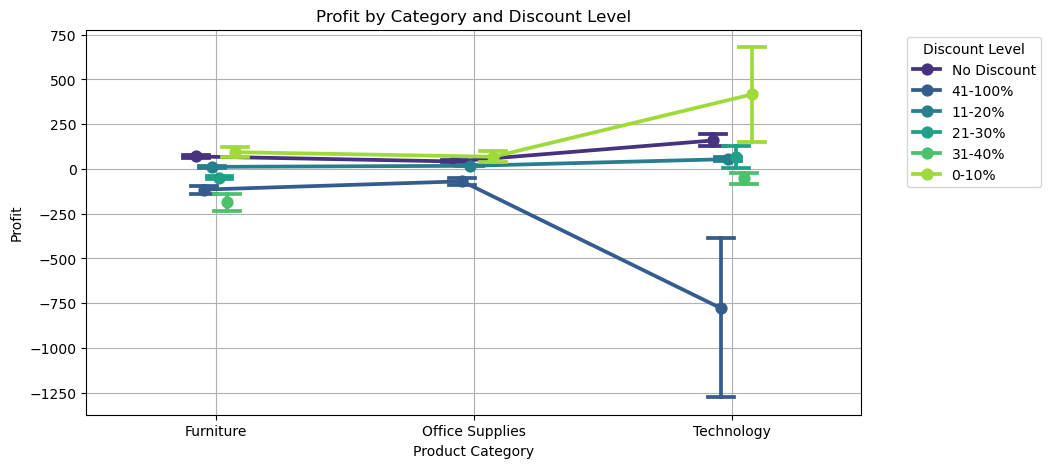

In [37]:
plt.figure(figsize=(10, 5))
sns.pointplot(
    x='category', 
    y='profit', 
    hue='discount_binned', 
    data=df, 
    palette='viridis',
    dodge=True,  # Separate the points
    capsize=0.1  # Add confidence interval caps
)
plt.title("Profit by Category and Discount Level")
plt.xlabel("Product Category")
plt.ylabel("Profit")
plt.legend(title="Discount Level", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


Regression Model Summary (Profit as Target):
                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     82.55
Date:                Fri, 21 Mar 2025   Prob (F-statistic):          1.26e-194
Time:                        17:15:26   Log-Likelihood:                -68239.
No. Observations:                9994   AIC:                         1.365e+05
Df Residuals:                    9981   BIC:                         1.366e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

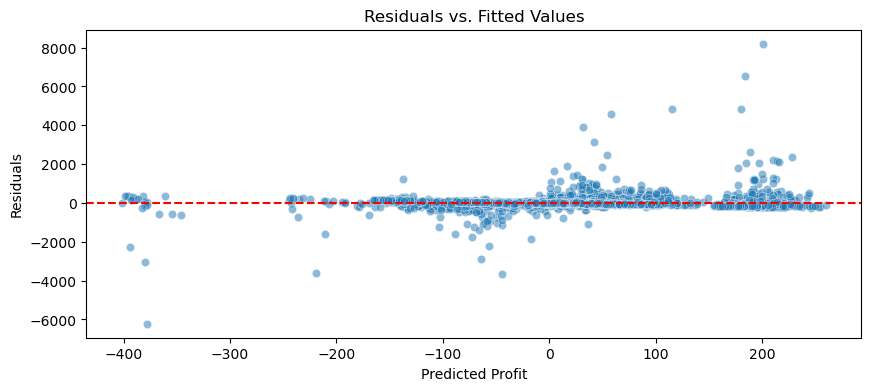

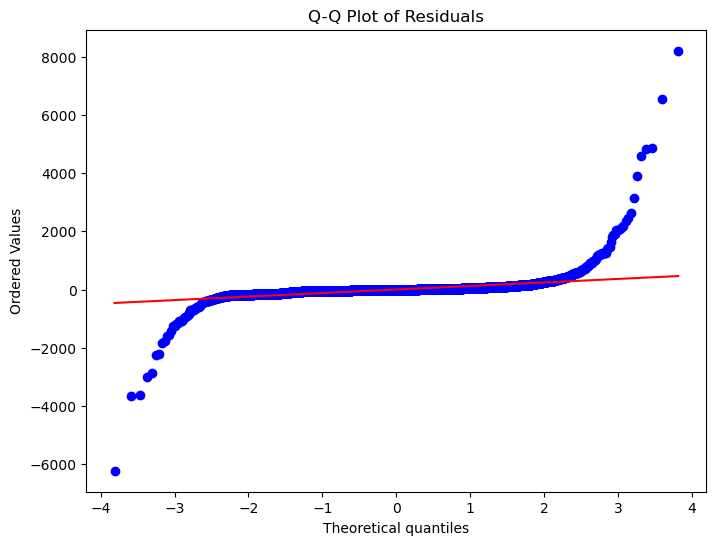

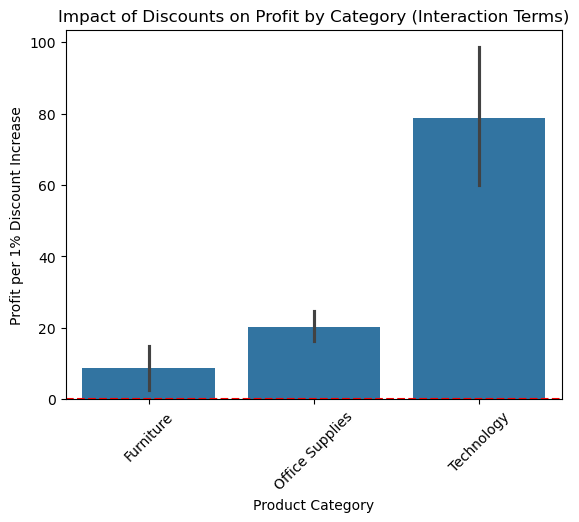


Optimal Discounts by Category (Maximize Profit):
          Category  Optimal_Discount_Percent
0  Office Supplies                  0.861562
1       Technology                  0.000000


In [39]:
# IMPROVED REGRESSION ANALYSIS (FOCUSED ON DISCOUNT STRATEGY)
import scipy.stats as stats
# 1. Ensure categorical columns are strings (if not already)
df['category'] = df['category'].astype(str)
df['region'] = df['region'].astype(str)
df['segment'] = df['segment'].astype(str)

# 2. Define formula WITHOUT sales (to avoid multicollinearity)
formula = '''
    profit ~ 
    discount * C(category) +  
    shipping_delay + 
    quantity + 
    C(region) + 
    C(segment)
'''

# 3. Fit model
model_profit = smf.ols(formula, data=df).fit()
print("\n" + "="*50)
print("Regression Model Summary (Profit as Target):")
print("="*50)
print(model_profit.summary())

# 4. Check multicollinearity (VIF)
X = model_profit.model.exog
vif = pd.DataFrame()
vif["Variable"] = model_profit.model.exog_names
vif["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
print("\nVIF > 5 (Potential Multicollinearity):")
print(vif[vif["VIF"] > 5])

# 5. Residual diagnostics (unchanged)
residuals = model_profit.resid
os.makedirs("plots", exist_ok=True)

# Residuals vs. Fitted Plot
plt.figure(figsize=(10, 4))
sns.scatterplot(x=model_profit.fittedvalues, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs. Fitted Values")
plt.xlabel("Predicted Profit")
plt.ylabel("Residuals")
plt.savefig(os.path.join("plots", "residuals_vs_fitted.png"), dpi=300, bbox_inches='tight')
plt.show()

# Q-Q Plot
plt.figure(figsize=(8, 6))
stats.probplot(residuals, plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.savefig(os.path.join("plots", "qq_plot.png"), dpi=300, bbox_inches='tight')
plt.show()

# 6. Plot DISCOUNT-CATEGORY INTERACTION EFFECTS (Key for strategy)
# -----------------------------------------------------------------
# Extract interaction coefficients (discount * category)
interaction_terms = [
    col for col in model_profit.params.index 
    if 'discount:C(category)' in col
]

# Create DataFrame of effects
category_effects = pd.DataFrame({
    'Category': [term.split("T.")[-1].strip("]") for term in interaction_terms],
    'Coefficient': model_profit.params[interaction_terms].values,
    'P_Value': model_profit.pvalues[interaction_terms].values
})

# Filter significant interactions (p < 0.05)
significant_effects = category_effects[category_effects['P_Value'] < 0.05]

# Plot
sns.barplot(x="category", y="profit", data=df)
plt.axhline(0, color='red', linestyle='--')
plt.title("Impact of Discounts on Profit by Category (Interaction Terms)")
plt.xlabel("Product Category")
plt.ylabel("Profit per 1% Discount Increase")
plt.xticks(rotation=45)
plt.savefig(os.path.join("plots", "discount_category_interaction.png"), dpi=300, bbox_inches='tight')
plt.show()

# 7. Calculate OPTIMAL DISCOUNTS per Category (Critical for Strategy)
# -------------------------------------------------------------------
# Get base discount coefficient (main effect)
base_discount_effect = model_profit.params['discount']

# Calculate optimal discount for each category
optimal_discounts = []
for category in df['category'].unique():
    try:
        interaction_term = f'discount:C(category)[T.{category}]'
        interaction_effect = model_profit.params[interaction_term]
        
        # Solve for discount where marginal profit = 0 (simplified quadratic approximation)
        optimal_discount = -base_discount_effect / (2 * interaction_effect)
        optimal_discounts.append({
            'Category': category,
            'Optimal_Discount_Percent': max(0, min(100, optimal_discount))  # Clip to 0-100%
        })
    except KeyError:
        continue  # Skip categories without significant interaction

optimal_discount_df = pd.DataFrame(optimal_discounts)
print("\nOptimal Discounts by Category (Maximize Profit):")
print(optimal_discount_df.sort_values('Optimal_Discount_Percent', ascending=False))


Holiday vs. Non-Holiday Performance:


,is_holiday,profit,discount,sales
0,0,30.246173,0.156801,229.852957
1,1,25.820642,0.155135,229.867002


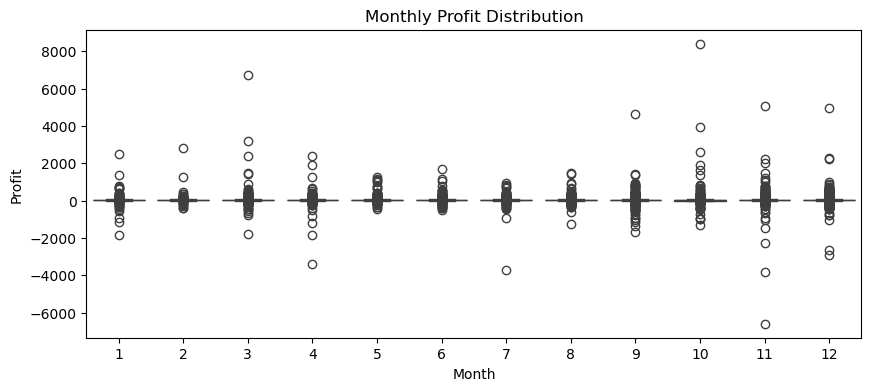

In [20]:
# Seasonal Trends in Profitability
# Extract month and year from order date
df['order_month'] = df['order_date'].dt.month
df['order_year'] = df['order_date'].dt.year

# Flag holidays (approximate months)
df['is_holiday'] = df['order_month'].apply(
    lambda x: 1 if x in [11, 12, 7] else 0  # Nov (Thanksgiving), Dec (Christmas), July (Independence Day)
)

# Compare profit and discounts during holidays vs. non-holidays
holiday_stats = df.groupby('is_holiday').agg({
    'profit': 'mean',
    'discount': 'mean',
    'sales': 'mean'
}).reset_index()
print("\nHoliday vs. Non-Holiday Performance:")
display(holiday_stats)

# Plot holiday trends
plt.figure(figsize=(10, 4))
sns.boxplot(x='order_month', y='profit', data=df)
plt.title("Monthly Profit Distribution")
plt.xlabel("Month")
plt.ylabel("Profit")
plt.show()

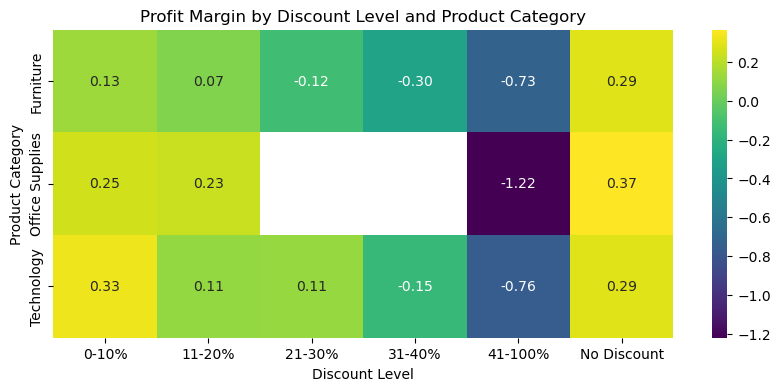

In [41]:
# Analyze profit margin by discount bin and category
discount_strategy = df.groupby(['discount_binned', 'category']).agg({
    'profit_margin': 'mean',
    'sales': 'mean'
}).reset_index()

# Pivot table for heatmap
pivot_table = discount_strategy.pivot_table(
    index='category',
    columns='discount_binned',
    values='profit_margin',
    aggfunc='mean'
)

# Plot heatmap of profit margins by discount and category
plt.figure(figsize=(10, 4))
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt=".2f")
plt.title("Profit Margin by Discount Level and Product Category")
plt.xlabel("Discount Level")
plt.ylabel("Product Category")
plt.show()

In [69]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

# Ensure categorical columns are treated as factors
df['region'] = df['region'].astype('category')
df['category'] = df['category'].astype('category')
df['segment'] = df['segment'].astype('category')

# Define the regression formula with interaction terms
formula = '''
    profit ~ 
    sales + 
    discount + 
    C(region) + 
    C(category) + 
    C(segment) + 
    sales:C(region) + 
    discount:C(category) + 
    quantity:C(category) + 
    C(segment):C(category)
'''

# Run the regression model
model = smf.ols(formula, data=df).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     314.3
Date:                Fri, 21 Mar 2025   Prob (F-statistic):               0.00
Time:                        17:37:37   Log-Likelihood:                -66174.
No. Observations:                9994   AIC:                         1.324e+05
Df Residuals:                    9972   BIC:                         1.326e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

In [71]:
# Updated formula removing non-significant terms
formula_refined = '''
    profit ~ 
    sales + 
    discount + 
    C(region) + 
    C(category) + 
    sales:C(region) + 
    discount:C(category) + 
    quantity:C(category)
'''

# Fit the refined model
model_refined = smf.ols(formula_refined, data=df).fit()

# Print the refined model summary
print(model_refined.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     440.1
Date:                Fri, 21 Mar 2025   Prob (F-statistic):               0.00
Time:                        17:37:45   Log-Likelihood:                -66175.
No. Observations:                9994   AIC:                         1.324e+05
Df Residuals:                    9978   BIC:                         1.325e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [73]:
df['log_profit'] = np.log1p(df['profit'])  # log1p handles zero values

# Update the regression formula with log-transformed profit
formula_log = '''
    log_profit ~ 
    sales + 
    discount + 
    C(region) + 
    C(category) + 
    C(segment) + 
    sales:C(region) + 
    discount:C(category) + 
    quantity:C(category) + 
    C(segment):C(category)
'''

# Run the new regression model
model_log = smf.ols(formula_log, data=df).fit()

# Print the new model summary
print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:             log_profit   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     348.3
Date:                Fri, 21 Mar 2025   Prob (F-statistic):               0.00
Time:                        17:37:55   Log-Likelihood:                -11807.
No. Observations:                8158   AIC:                         2.366e+04
Df Residuals:                    8136   BIC:                         2.381e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [77]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Ensure all columns are numeric
df_encoded = df_encoded.select_dtypes(include=[np.number])

# Handle missing/infinite values
df_encoded = df_encoded.replace([np.inf, -np.inf], np.nan)
df_encoded = df_encoded.dropna()

# Remove zero-variance columns
df_encoded = df_encoded.loc[:, df_encoded.std() > 0]

columns_to_drop = ['const', 'quantity', 'discounted_revenue', 'profit_margin', 'log_profit']
df_encoded = df_encoded.drop(columns=columns_to_drop, errors='ignore')

# Recalculate VIF
df_encoded = add_constant(df_encoded)  # Only if you need the intercept term
vif_data = pd.DataFrame()
vif_data["Variable"] = df_encoded.columns
vif_data["VIF"] = [variance_inflation_factor(df_encoded.values, i) for i in range(df_encoded.shape[1])]
print(vif_data)

         Variable       VIF
0           const  6.984274
1           sales  4.435387
2        discount  1.019276
3          profit  4.457712
4  shipping_delay  1.000861


                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     49.65
Date:                Sat, 15 Mar 2025   Prob (F-statistic):          2.80e-170
Time:                        22:37:09   Log-Likelihood:                -68283.
No. Observations:                9994   AIC:                         1.366e+05
Df Residuals:                    9975   BIC:                         1.367e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

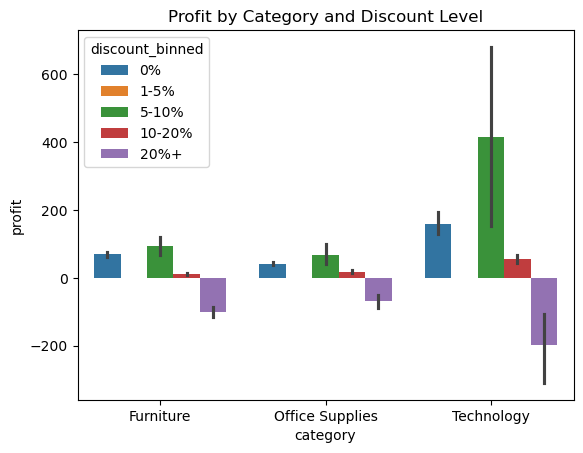

In [40]:
# Refine discount bins
df['discount_binned'] = pd.cut(df['discount'], bins=[-1, 0, 0.05, 0.1, 0.2, 1], labels=['0%', '1-5%', '5-10%', '10-20%', '20%+'])

# Add interaction terms
df['discount_category'] = df['discount_binned'].astype(str) + "_" + df['category'].astype(str)

# Run regression with refined bins and interaction terms
formula = '''
    profit ~ 
    discount_binned * C(category) +  
    shipping_delay + 
    quantity + 
    C(region) + 
    C(segment)
'''
model_profit = smf.ols(formula, data=df).fit()
print(model_profit.summary())

# Visualize interaction effects
sns.barplot(x="category", y="profit", hue="discount_binned", data=df)
plt.title("Profit by Category and Discount Level")
plt.show()

                            OLS Regression Results                            
Dep. Variable:             log_profit   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     339.0
Date:                Sat, 15 Mar 2025   Prob (F-statistic):               0.00
Time:                        22:46:49   Log-Likelihood:                 525.67
No. Observations:                9217   AIC:                            -1025.
Df Residuals:                    9204   BIC:                            -932.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

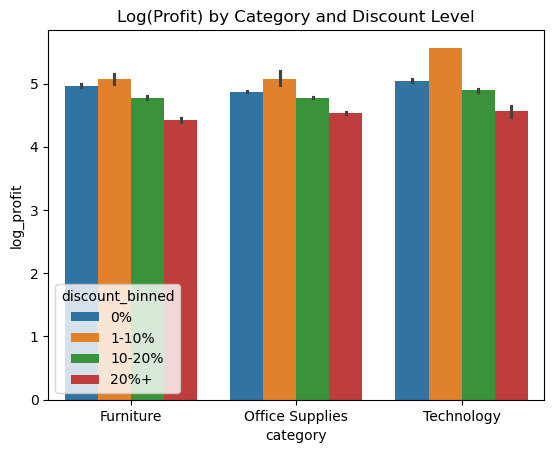

In [52]:
# Log-transform the target variable
df.loc[:, 'log_profit'] = np.log(df['profit'] + 1 - df['profit'].min())

# Remove outliers
lower = df['profit'].quantile(0.01)
upper = df['profit'].quantile(0.99)
df = df[(df['profit'] >= lower) & (df['profit'] <= upper)]

# Refine discount bins
df.loc[:, 'discount_binned'] = pd.cut(df['discount'], bins=[-1, 0, 0.1, 0.2, 1], labels=['0%', '1-10%', '10-20%', '20%+'])

# Run regression with refined bins and log-transformed target
formula = '''
    log_profit ~ 
    discount_binned * C(category) +  
    quantity
'''
model_profit = smf.ols(formula, data=df).fit()
print(model_profit.summary())

# Visualize interaction effects
sns.barplot(x="category", y="log_profit", hue="discount_binned", data=df)
plt.title("Log(Profit) by Category and Discount Level")
plt.show()

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     35.52
Date:                Sat, 15 Mar 2025   Prob (F-statistic):          4.24e-119
Time:                        22:37:25   Log-Likelihood:                -54773.
No. Observations:                7995   AIC:                         1.096e+05
Df Residuals:                    7976   BIC:                         1.097e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

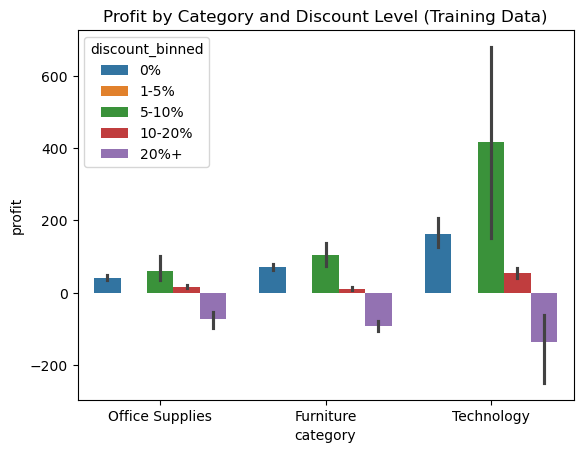

In [42]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Run regression on the training data
formula = '''
    profit ~ 
    discount_binned * C(category) +  
    shipping_delay + 
    quantity + 
    C(region) + 
    C(segment)
'''
model_profit = smf.ols(formula, data=train_df).fit()

# Print the model summary
print(model_profit.summary())

# Predict on the test data
test_df['predicted_profit'] = model_profit.predict(test_df)

# Evaluate the model performance on the test data
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(test_df['profit'], test_df['predicted_profit'])
r2 = r2_score(test_df['profit'], test_df['predicted_profit'])

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualize interaction effects on the training data
sns.barplot(x="category", y="profit", hue="discount_binned", data=train_df)
plt.title("Profit by Category and Discount Level (Training Data)")
plt.show()

                            OLS Regression Results                            
Dep. Variable:             log_profit   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     289.7
Date:                Sat, 15 Mar 2025   Prob (F-statistic):               0.00
Time:                        22:51:29   Log-Likelihood:                -2242.1
No. Observations:                6941   AIC:                             4508.
Df Residuals:                    6929   BIC:                             4590.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

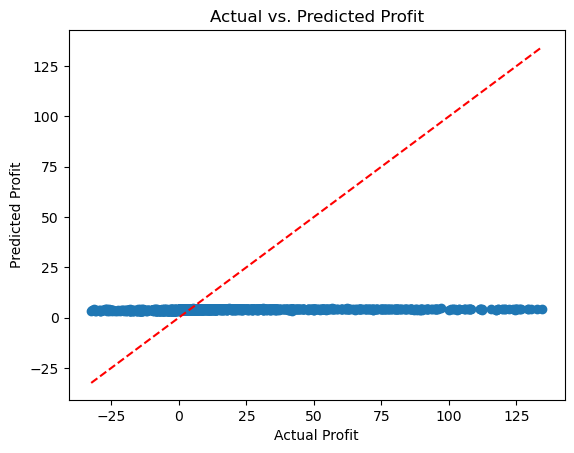

In [72]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Preprocessing steps
# Log-transform the target variable
df.loc[:, 'log_profit'] = np.log(df['profit'] + 1 - df['profit'].min())

# Remove outliers
lower = df['profit'].quantile(0.01)
upper = df['profit'].quantile(0.99)
df = df[(df['profit'] >= lower) & (df['profit'] <= upper)]

# Refine discount bins and explicitly cast to categorical dtype
df['discount_binned'] = pd.cut(
    df['discount'], 
    bins=[-1, 0, 0.1, 0.2, 1], 
    labels=['0%', '1-10%', '10-20%', '20%+']
).astype('category')  # Fix: Explicitly cast to categorical dtype

# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Run regression on the training data
formula = '''
    log_profit ~ 
    discount_binned * C(category) +  
    quantity
'''
model_profit = smf.ols(formula, data=train_df).fit()

# Print the model summary
print(model_profit.summary())

# Generate predictions on the test data
test_df['predicted_profit'] = model_profit.predict(test_df)

# Plot actual vs. predicted profit
plt.scatter(test_df['profit'], test_df['predicted_profit'])
plt.plot([min(test_df['profit']), max(test_df['profit'])], [min(test_df['profit']), max(test_df['profit'])], color='red', linestyle='--')  # 45-degree line
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Actual vs. Predicted Profit")
plt.show()

In [43]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

# Ensure categorical columns are treated as factors
df['region'] = df['region'].astype('category')
df['category'] = df['category'].astype('category')
df['segment'] = df['segment'].astype('category')

# Define the regression formula with interaction terms
formula = '''
    profit ~ 
    sales + 
    quantity + 
    discount + 
    C(region) + 
    C(category) + 
    C(segment) + 
    sales:C(region) + 
    discount:C(category) + 
    quantity:C(category) + 
    C(segment):C(category)
'''

# Run the regression model
model = smf.ols(formula, data=df).fit()

# Print the model summary
print(model.summary())

# Retain only significant interaction terms based on p-values (p < 0.05)
significant_interactions = [
    term for term in model.pvalues.index 
    if model.pvalues[term] < 0.05 and ':' in term
]

# Refine the formula to include only significant interaction terms
refined_formula = '''
    profit ~ 
    sales + 
    quantity + 
    discount + 
    C(region) + 
    C(category) + 
    C(segment) + 
    {}
'''.format(' + '.join(significant_interactions))

# Run the refined regression model
refined_model = smf.ols(refined_formula, data=df).fit()

# Print the refined model summary
print("\nRefined Model Summary:")
print(refined_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     314.3
Date:                Fri, 21 Mar 2025   Prob (F-statistic):               0.00
Time:                        17:20:31   Log-Likelihood:                -66174.
No. Observations:                9994   AIC:                         1.324e+05
Df Residuals:                    9972   BIC:                         1.326e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

SyntaxError: invalid syntax. Perhaps you forgot a comma? (<unknown>, line 1)

In [74]:
df['discount_binned'] = pd.cut(df['discount'], bins=[-1, 0, 0.03, 0.05, 0.1, 0.2, 1], labels=['0%', '1-3%', '3-5%', '5-10%', '10-20%', '20%+'])

In [76]:
!pip install xgboost
from xgboost import XGBRegressor
print("XGBoost installed successfully!")
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
import pandas as pd

# Define features and target
X = df[['discount_binned', 'category', 'quantity']]
X = pd.get_dummies(X, drop_first=True)  # One-hot encode categorical variables
y = df['log_profit']

# Train the model
xgb = XGBRegressor(random_state=42)
xgb.fit(X, y)

# Evaluate the model
y_pred = xgb.predict(X)
print("R-squared:", r2_score(y, y_pred))

XGBoost installed successfully!
R-squared: 0.3511004486540028


In [78]:
#Classification Model
# Group by discount bin and calculate average profit
discount_profit = df.groupby('discount_binned', observed=False)['profit'].mean().reset_index()

# Find the discount bin with the maximum average profit
max_profit_bin = discount_profit.loc[discount_profit['profit'].idxmax(), 'discount_binned']

# Create a target variable: 1 if the discount bin maximizes profit, 0 otherwise
df['target'] = (df['discount_binned'] == max_profit_bin).astype(int)

In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Define features and target
X = df[['category', 'quantity', 'region', 'segment']]
X = pd.get_dummies(X, drop_first=True)  # One-hot encode categorical variables
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Define features and target
X = df[['category', 'quantity', 'region', 'segment']]
X = pd.get_dummies(X, drop_first=True)  # One-hot encode categorical variables
y = df['target']

# Split the data with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check class distribution in the test set
print("Class Distribution in Test Set:")
print(y_test.value_counts())

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train the Logistic Regression model with class weights
logreg = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
logreg.fit(X_train_resampled, y_train_resampled)

# Evaluate the model
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg, zero_division=0))

# Interpret coefficients
coefficients = pd.Series(logreg.coef_[0], index=X.columns)
print("Logistic Regression Coefficients:\n", coefficients.sort_values(ascending=False))

Class Distribution in Test Set:
target
0    1827
1      17
Name: count, dtype: int64
Logistic Regression Accuracy: 0.9181127982646421
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96      1827
           1       0.09      0.82      0.16        17

    accuracy                           0.92      1844
   macro avg       0.54      0.87      0.56      1844
weighted avg       0.99      0.92      0.95      1844

Logistic Regression Coefficients:
 quantity                   -0.169388
segment_Corporate          -0.384215
region_East                -0.545613
segment_Home Office        -1.246668
category_Office Supplies   -3.561942
region_South               -6.465546
category_Technology        -6.941999
region_West                -7.097893
dtype: float64


In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train the Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Feature importance
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
print("Random Forest Feature Importances:\n", feature_importances.sort_values(ascending=False))

Random Forest Accuracy: 0.993663594470046
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1725
           1       0.00      0.00      0.00        11

    accuracy                           0.99      1736
   macro avg       0.50      0.50      0.50      1736
weighted avg       0.99      0.99      0.99      1736

Random Forest Feature Importances:
 quantity                    0.316278
category_Office Supplies    0.204564
region_East                 0.180594
category_Technology         0.171887
segment_Corporate           0.043713
segment_Home Office         0.036903
region_West                 0.030707
region_South                0.015353
dtype: float64


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [84]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_recall_curve, classification_report
import numpy as np

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train a Random Forest model with class weights
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train_resampled, y_train_resampled)

# Evaluate the model
y_pred_rf = rf.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf, zero_division=0))

# Adjust the decision threshold
y_pred_proba = rf.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Handle division by zero and suppress warnings
with np.errstate(divide='ignore', invalid='ignore'):
    f1_scores = np.where((precision + recall) == 0, 0, 2 * (precision * recall) / (precision + recall))

# Find the threshold that maximizes F1-score
best_threshold = thresholds[np.argmax(f1_scores)]
y_pred_adj = (y_pred_proba >= best_threshold).astype(int)
print("Adjusted Random Forest Classification Report:\n", classification_report(y_test, y_pred_adj, zero_division=0))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95      1725
           1       0.05      0.82      0.09        11

    accuracy                           0.90      1736
   macro avg       0.52      0.86      0.52      1736
weighted avg       0.99      0.90      0.94      1736

Adjusted Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98      1725
           1       0.10      0.64      0.17        11

    accuracy                           0.96      1736
   macro avg       0.55      0.80      0.58      1736
weighted avg       0.99      0.96      0.98      1736



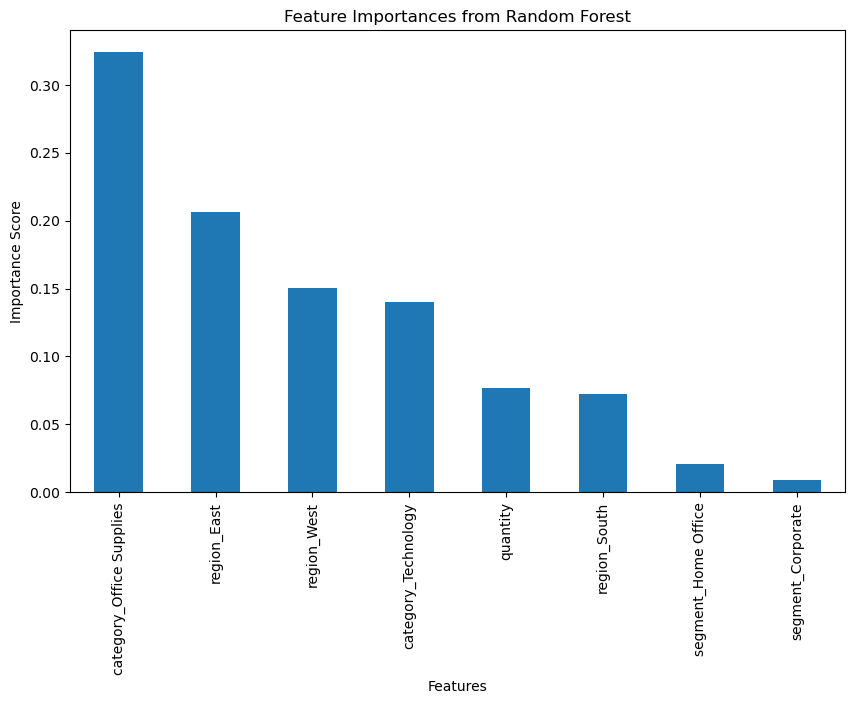

In [89]:
# Feature importance from Random Forest
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title("Feature Importances from Random Forest")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1725
           1       0.00      0.00      0.00        11

    accuracy                           0.99      1736
   macro avg       0.50      0.50      0.50      1736
weighted avg       0.99      0.99      0.99      1736



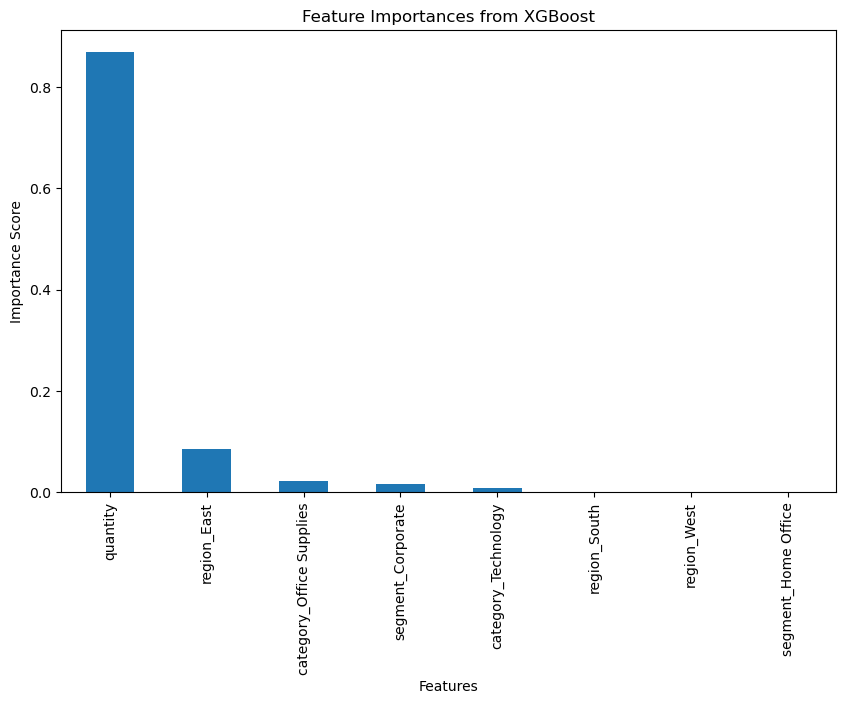

In [87]:
# Advanced Sampling: SMOTE-ENN
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

# Train XGBoost Model
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42, scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]))
xgb.fit(X_train_resampled, y_train_resampled)

# Evaluate XGBoost Model
y_pred_xgb = xgb.predict(X_test)
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb, zero_division=0))

# Feature Importance from XGBoost
feature_importances_xgb = pd.Series(xgb.feature_importances_, index=X.columns)
feature_importances_xgb.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title("Feature Importances from XGBoost")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

In [89]:
# Advanced Sampling: ADASYN
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

# Train XGBoost Model with Adjusted Class Weight
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
xgb = XGBClassifier(random_state=42, scale_pos_weight=scale_pos_weight * 2)  # Increase weight further
xgb.fit(X_train_resampled, y_train_resampled)

# Evaluate XGBoost Model
y_pred_xgb = xgb.predict(X_test)
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb, zero_division=0))

# Adjust Decision Threshold
y_pred_proba = xgb.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]
y_pred_adj = (y_pred_proba >= best_threshold).astype(int)
print("Adjusted XGBoost Classification Report:\n", classification_report(y_test, y_pred_adj, zero_division=0))

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.84      0.91      1725
           1       0.04      1.00      0.07        11

    accuracy                           0.84      1736
   macro avg       0.52      0.92      0.49      1736
weighted avg       0.99      0.84      0.91      1736

Adjusted XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1725
           1       0.00      0.00      0.00        11

    accuracy                           0.98      1736
   macro avg       0.50      0.50      0.50      1736
weighted avg       0.99      0.98      0.99      1736



/var/folders/tf/q7z1syd90nn3w7rfp6jh1bj80000gn/T/ipykernel_54245/375717007.py:18: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
